# Introducción
El dataset contiene datos relacionados con las campañas de marketing dirigidas (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá (1/0) un depósito a plazo (variable y).El dataset contiene datos relacionados con las campañas de marketing dirigidas (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá (1/0) un depósito a plazo (variable y).

# Analisis de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [31]:
# Target, desbalanceado
Total_y = df.y.value_counts().sum()
print(df.y.value_counts())
print('0:',df.y.value_counts()[0]*100/Total_y)
print('1:',df.y.value_counts()[1]*100/Total_y)

0    36548
1     4640
Name: y, dtype: int64
0: 88.73458288821988
1: 11.26541711178013


In [9]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
# Vamos a reducir las clases basic.4y, basic.6y y basic.9y a solo basic
df['education'] = np.where(df['education']=='basic.4y','basic',df['education']) 
df['education'] = np.where(df['education']=='basic.6y','basic',df['education']) 
df['education'] = np.where(df['education']=='basic.9y','basic',df['education']) 

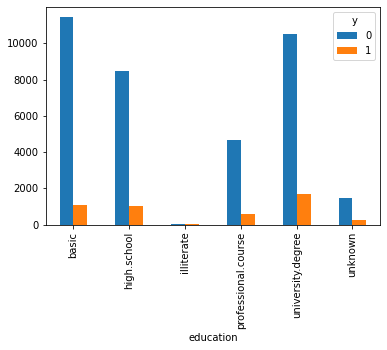

In [13]:
pd.crosstab(df.education,df.y).plot(kind='bar')

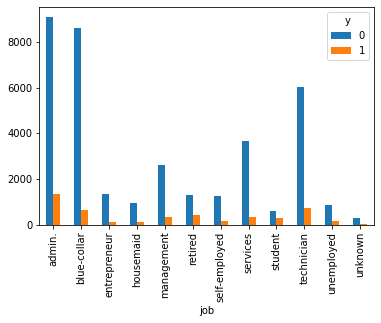

In [14]:
pd.crosstab(df.job,df.y).plot(kind='bar')

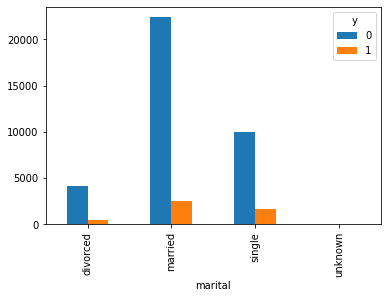

In [15]:
pd.crosstab(df.marital,df.y).plot(kind='bar')

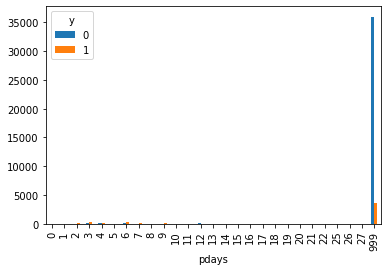

In [17]:
pd.crosstab(df.pdays,df.y).plot(kind='bar')

In [ ]:
pd.crosstab(df.pdays,df.y)

# Preprocesado de los datos.

In [32]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [35]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [36]:
X = df.drop('y', axis=1).copy() # axis=1 columna
X.shape , df.shape

((41188, 20), (41188, 21))

In [37]:
y = df['y'].copy()
y.shape

(41188,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
num_columns = X.select_dtypes(include=['int64','float64']).columns.to_list()
numeric_transformer = StandardScaler()

In [41]:
cat_columns = X.select_dtypes(include=['O']).columns.to_list()
categorical_transformer = OneHotEncoder(handle_unknown='ignore',drop='first')

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)])

# Modelado
## Uso GridSearchCV, con scoring = 'roc_auc' o 'recall'.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

In [45]:
pipe = Pipeline([('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000))])
param_grid = {'classifier__C':[10**x for x in range(-3, 3)],'classifier__penalty':['l2', 'none']}

In [46]:
model = GridSearchCV(pipe,param_grid, cv=3,scoring='recall')

In [ ]:
model.fit(X_train, y_train)

In [48]:
results = pd.DataFrame(model.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)

In [ ]:
model.best_estimator_

In [50]:
print("Puntuación del conjunto de pruebas: {:.2f}".format(model.score(X_test, y_test))) # y_test.squeeze()
print("Best parameters: {}".format(model.best_params_))
print("Mejor puntaje de validación cruzada: {:.2f}".format(model.best_score_))

Puntuación del conjunto de pruebas: 0.43
Best parameters: {'classifier__C': 0.001, 'classifier__penalty': 'none'}
Mejor puntaje de validación cruzada: 0.42


# Métricas de evaluación

In [51]:
# Con los mejores parametros de GridSearchCV instanceamos un nuevo modelo:
logistic = Pipeline([('preprocessor', preprocessor),('classifier', LogisticRegression(C=0.001,penalty='none',max_iter=1000))])
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [53]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


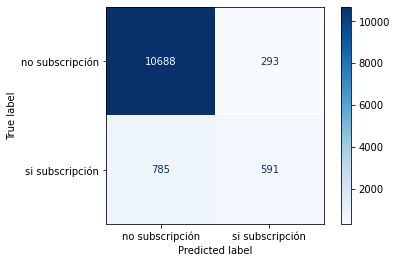

In [54]:
class_names = ['no subscripción', 'si subscripción']

disp = plot_confusion_matrix(logistic, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [56]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.912762
Precision: 0.668552
Recall: 0.429506
F1 score: 0.523009


# Curva ROC y AUC

In [57]:
probabilidades = logistic.predict_proba(X_test)
probabilidades

array([[0.95161492, 0.04838508],
       [0.7266211 , 0.2733789 ],
       [0.99243672, 0.00756328],
       ...,
       [0.96777797, 0.03222203],
       [0.98879378, 0.01120622],
       [0.96847298, 0.03152702]])

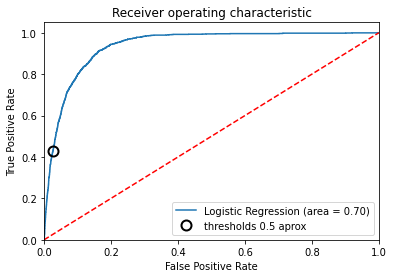

In [58]:
from sklearn.metrics import roc_auc_score # AREA BAJO LA CURVA
from sklearn.metrics import roc_curve # CURVA
logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('Log_ROC')
close = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[close],tpr[close],'o',markersize=10,label='thresholds 0.5 aprox',fillstyle='none',c='k',mew=2)
plt.legend(loc="lower right")
plt.show()

# SMOTE Oversampling (Solución).
Se pueden sintetizar nuevos ejemplos a partir de los ejemplos existentes. Este es un tipo de aumento de datos para la clase minoritaria y se conoce como Técnica de sobremuestreo de minorías sintéticas , o SMOTE (Synthetic Minority Oversampling Technique) para abreviar.

In [63]:
# Target, desbalanceado
Total_y = y.value_counts().sum()
print(y.value_counts())
print('0:',y.value_counts()[0]*100/Total_y)
print('1:',y.value_counts()[1]*100/Total_y)

0    36548
1     4640
Name: y, dtype: int64
0: 88.73458288821988
1: 11.26541711178013


In [64]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore',drop='first')

In [65]:
cat_columns = X.select_dtypes(include='O').columns.to_list()

In [ ]:
# Categorico
categorical_transformer.fit(X[cat_columns])
categorical_transformer.get_feature_names()

In [67]:
X_trans = categorical_transformer.transform(X[cat_columns])

In [68]:
# Aca transformo en DataFrame a X_trans luego de encodearlo
X_trans = pd.DataFrame(X_trans.toarray(), columns = categorical_transformer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
# Junto todo
X = X.drop(columns=cat_columns)

In [70]:
X_1 = X.join(X_trans).copy()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

# revisamos los nros en nuestra data
print("Longitud de data oversampleada: ",len(os_data_X))
print("Numero de no subscripciones en data oversampleada: ",len(os_data_y[os_data_y['y']==0]))
print("Cantidad de subscripciones: ",len(os_data_y[os_data_y['y']==1]))
print("Proporción de no subscripciones en data oversampleada: ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proporción de subscripciones en data oversampleada: ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Longitud de data oversampleada:  51134
Numero de no subscripciones en data oversampleada:  25567
Cantidad de subscripciones:  25567
Proporción de no subscripciones en data oversampleada:  0.5
Proporción de subscripciones en data oversampleada:  0.5


## Entreno un modelo con estos nuevos datos.

In [84]:
logistic2 = LogisticRegression(C=0.001,penalty='none',max_iter=10000)
logistic2.fit(os_data_X,os_data_y)
y_pred = logistic2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.862588
Precision: 0.440104
Recall: 0.859738
F1 score: 0.582185


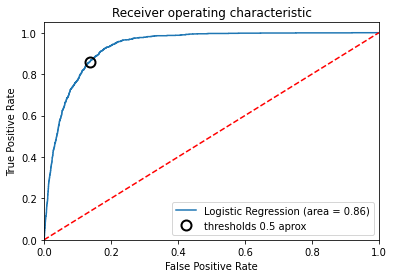

In [85]:
from sklearn.metrics import roc_auc_score # AREA BAJO LA CURVA
from sklearn.metrics import roc_curve # CURVA
logit_roc_auc = roc_auc_score(y_test, logistic2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig('Log_ROC')
close = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[close],tpr[close],'o',markersize=10,label='thresholds 0.5 aprox',fillstyle='none',c='k',mew=2)
plt.legend(loc="lower right")
plt.show()

Vemos que el área bajo la curva aumento de 0.70 a 0.86 usando SMOTE.